# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neura networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

In [ ]:
# We are going to downgrade tensorflow because the new version gave us poblems with our code. This version works fine
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)


In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our dat is a little hard to understand right now... let's visualize it!


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


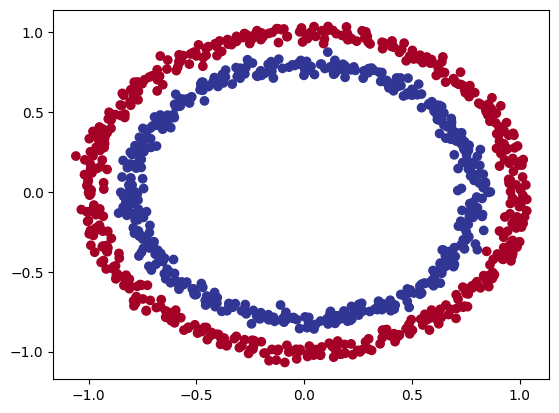

In [ ]:
# visualize it with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

#Fit the model
model.fit(X, y, epochs=5)

# Evaluate the model\
model.evaluate(X,y)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 6.5017 - accuracy: 0.4930
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 6.3997 - accuracy: 0.4940
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 6.3833 - accuracy: 0.4920
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 6.3225 - accuracy: 0.4850
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 5.9419 - accuracy: 0.4790


[5.941869735717773, 0.4790000021457672]

In [ ]:
model.fit(X,y,epochs=200, verbose=0)

In [ ]:
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose = 0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932618618011475, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidding units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perphaps we might fit our model for more epochs (leave it training for longer).


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model(this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5100


[0.6994479894638062, 0.5099999904632568]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a [meshgrid](https://numpy.org/doc/2.0/reference/generated/numpy.meshgrid.html) of the different X values.
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot an create a meshgrid
  # There are the boundaries
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  # This is the meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), # return a 100 values between those boundaries
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're goint to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy,y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [ ]:
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  x_min, x_max, y_max, y_min

(-1.1595024599098636,
 1.1337117525463374,
 1.1360036756154805,
 -1.1677683182718437)

313/313 [==============================] - 0s 1ms/step
Doing binary classification


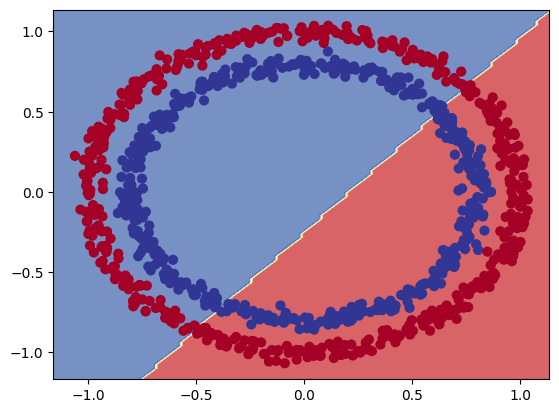

In [ ]:
#Check out the predictions our model is making
plot_decision_boundary(model= model_3,
                       X = X,
                       y=y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)


Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 396.2371 - mae: 396.2371
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 250.5509 - mae: 250.5509
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 109.5278 - mae: 109.5278
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 60.3657 - mae: 60.3657
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 85.2628 - mae: 85.2628
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 58.4390 - mae: 58.4390
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 46.2772 - mae: 46.2772
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 44.9032 - mae: 44.9032
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 45.0597 - mae: 45.0597
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.1576 - mae: 43.1576
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 6ms/step


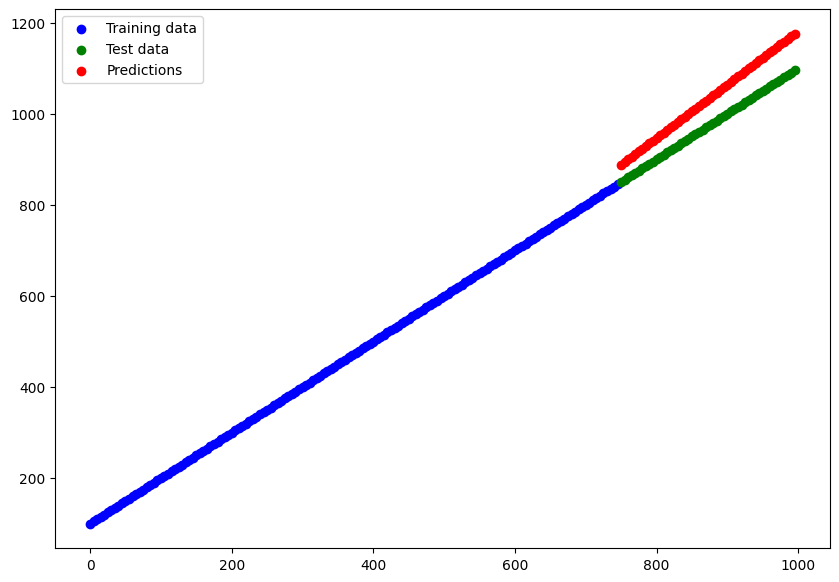

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data" )
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3. Fit the model
history = model_4.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.9595 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1466 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9298 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8282 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7717 - accuracy: 0.4970
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.4970
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.4960
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5010
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4520
Epoch 11/

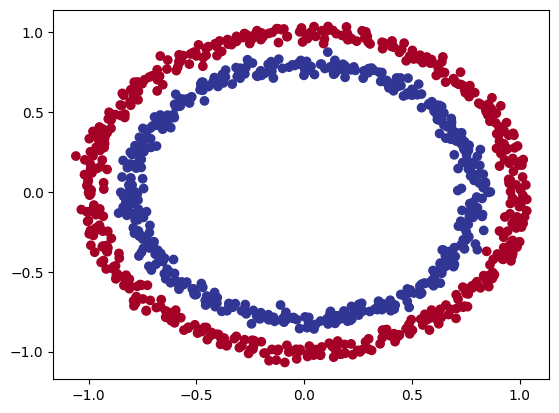

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
Doing binary classification


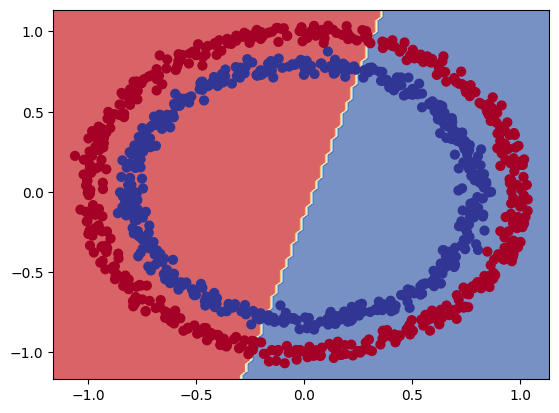

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4, X, y)

Let's try build our first neural network with a non-linear activation function.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.5806 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3841 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2632 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0355 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9141 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8233 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7003 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6006 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5731 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5581 - accuracy: 0.4760
Epoch 11/

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X,y, epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 4ms/step - loss: 0.1759 - accuracy: 0.5040
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1749 - accuracy: 0.5020
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1742 - accuracy: 0.4990
Epoch 4/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1737 - accuracy: 0.5080
Epoch 5/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1732 - accuracy: 0.5080
Epoch 6/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1728 - accuracy: 0.5070
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1724 - accuracy: 0.5100
Epoch 8/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1721 - accuracy: 0.5120
Epoch 9/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1717 - accuracy: 0.5160
Epoch 10/500
32/32 [==============================] - 0s 4ms/step - loss: 0.1714 - accuracy: 0.5330
Epoch 11/

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9980


[0.0030486476607620716, 0.9980000257492065]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


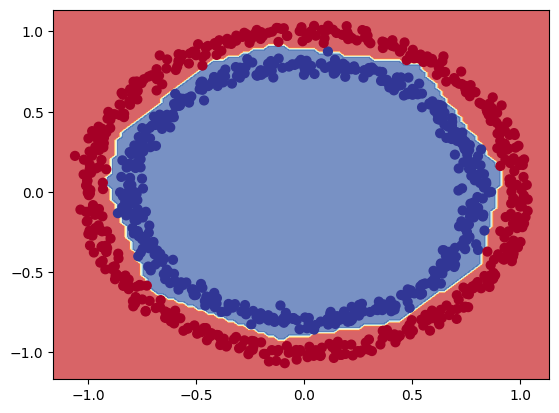

In [ ]:
# How do our model predctions look?
plot_decision_boundary(model_6,X,y)

🤔 **Question:** What's wrong with the predictions we have made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straigth lines) and non-linear (non-straigth lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [ ]:
# create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

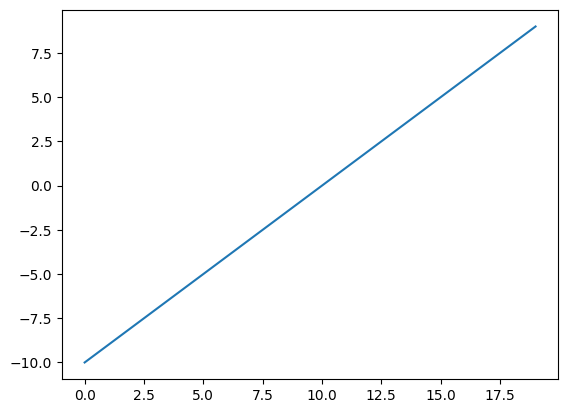

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's start by repliating sigmoid - sigmoid(x) =1/ (1+exp(-x))
def sigmoid(x):
  return 1 / (1+tf.exp(-x))

#Use the sigmoid function on our toy function
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

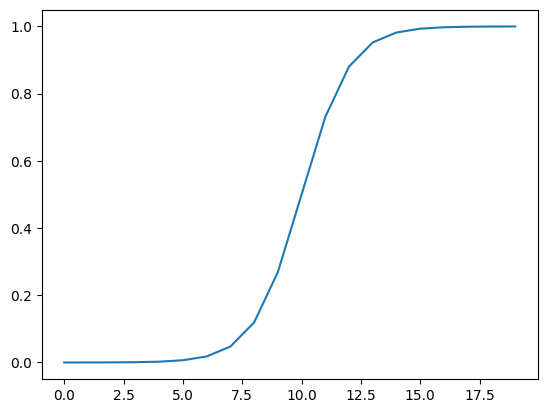

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# Let's recreate the reul function
def relu(x):
  return tf.maximum(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

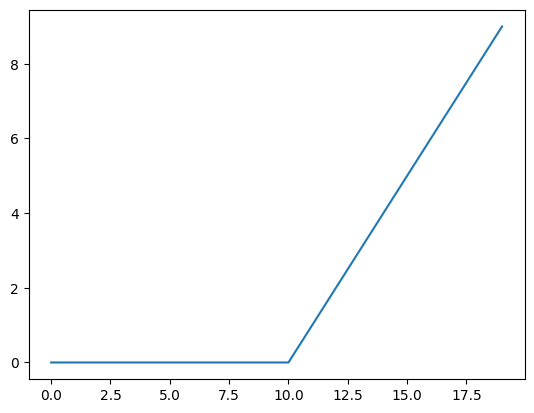

In [ ]:
plt.plot(relu(A));

In [ ]:
# Let's try linear activation
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

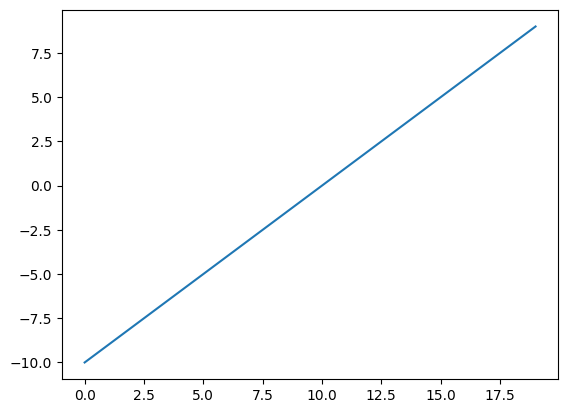

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [ ]:
# Check how many example we have
len(X)

1000

In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [ ]:
#Let's recreate a model to fit on the traning data and evaluate on the testinng data
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.1749 - accuracy: 0.5325
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1673 - accuracy: 0.6475
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.7188
Epoch 5/100
25/25 [==============================] - 1s 22ms/step - loss: 0.1493 - accuracy: 0.7525
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1383 - accuracy: 0.8213
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1265 - accuracy: 0.8900
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.8763
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9175
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.9450
Epoch 11

In [ ]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9950


[0.006547327619045973, 0.9950000047683716]

313/313 [==============================] - 1s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


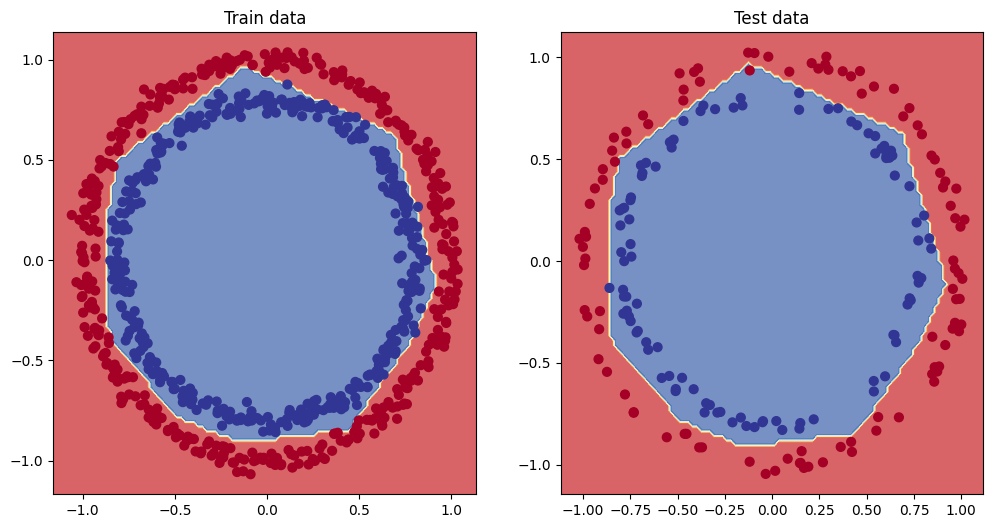

In [ ]:
# Plot the decsion boundaries for thre training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2,1)
plt.title("Train data")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test data")
plot_decision_boundary(model_8, X_test, y_test)

## Plot the loss (or training curves)

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.174945,0.53250
1,0.167347,0.64750
2,0.163590,0.62500
3,0.157266,0.71875
4,0.149341,0.75250
...,...,...
95,0.006149,0.99500
96,0.004094,0.99625
97,0.004115,0.99625
98,0.004224,0.99500


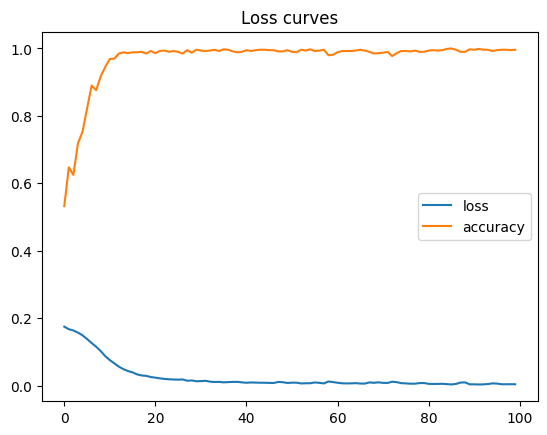

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Loss curves")
plt.show()

🔑 **Note:** FOr many problems, the loss function is going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model  *while*  it's training.

* Another model (we could use the same one as above but we're practicing building models here)

* A modified loss curves plot.

In [ ]:
# SEt random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
# 1. Create a model with a non-linear activation
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer= "Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10**(epoch/20))

# Fit the model
history = model_9.fit(X_train, y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.5238 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.5250 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5238 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5238 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5238 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5213 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5200 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5200 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

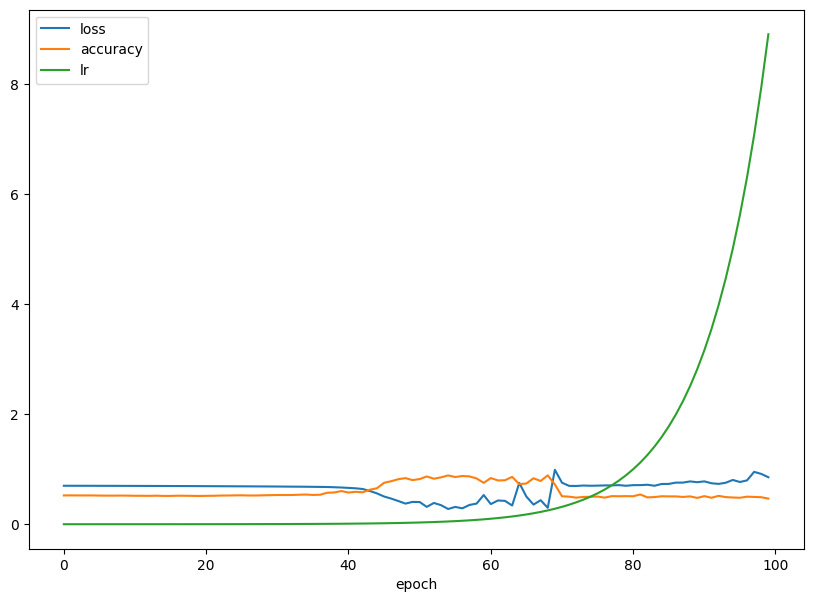

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epoch')
plt.show()

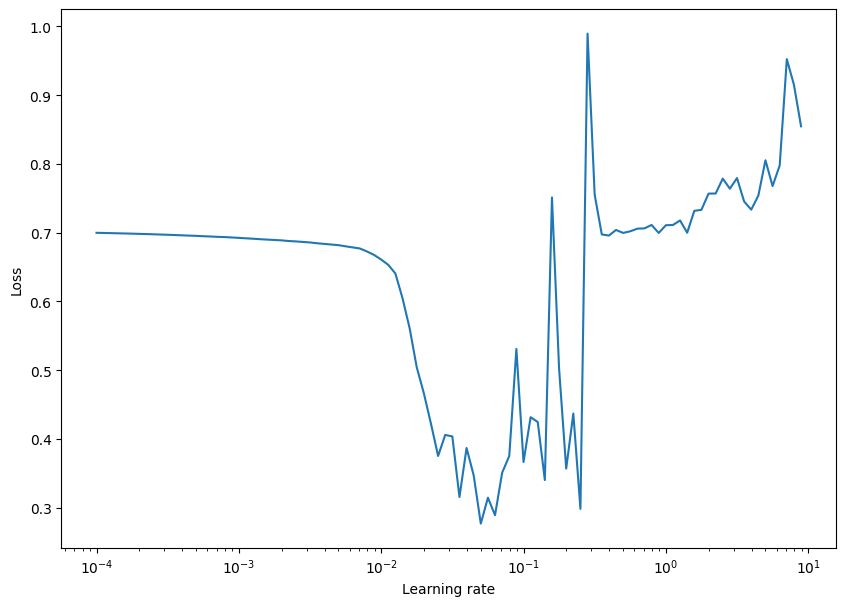

In [ ]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss");

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Whenever you use an optimizer , the default parameters are normally pretty good.

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.4975
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5725
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5587
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6313
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.6375
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.6687
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.7513
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.7700
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8112
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8213
Epoch 11/20
25/25 [

## More classification evaluation metrics methods

Alongside visualizing our model's results as muchas a possible, there are a handfulof other classification evaluations methods and metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1 score
* Confusion matrix
* Classification report (from scikit-learn)



In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set:{(accuracy*100):.2f}% ')

7/7 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8300
Model loss on the test set: 0.3803309202194214
Model accuracy on the test set:83.00% 


How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

#Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

Oopss... looks like our predictions array has come out in **prediction probabilty** form... the standar output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilites to binary format and view the first 10
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[71, 30],
       [ 4, 95]])

How about we prettify our confusion matrix?

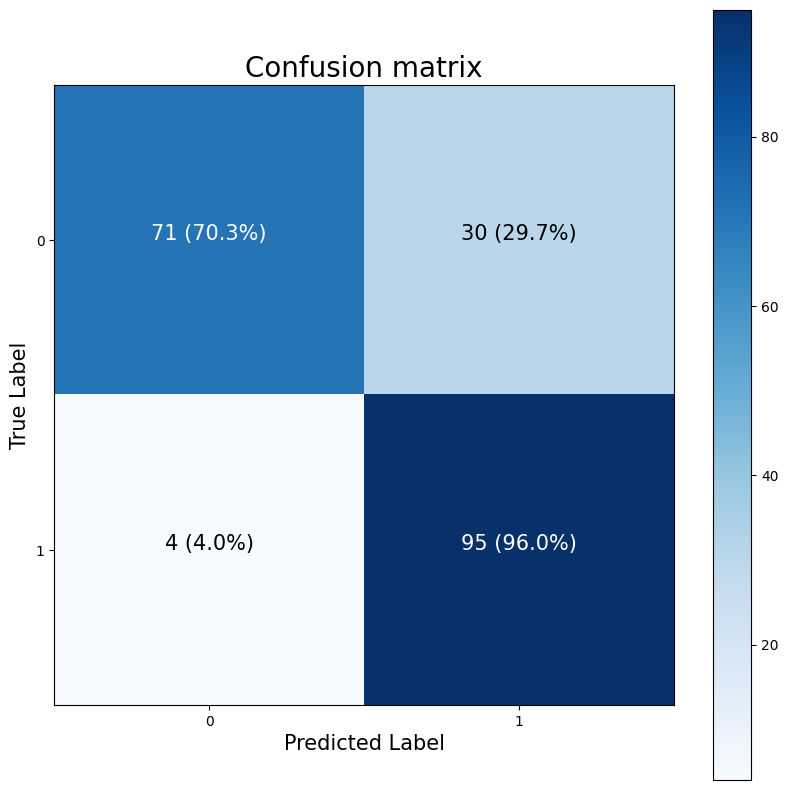

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else: labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) /2.

#Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)



# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if three different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.




In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# The data has alreday been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print (f'Training sample: \n{train_data[0]}\n')
print (f'Training label: \n{train_labels[0]}')

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

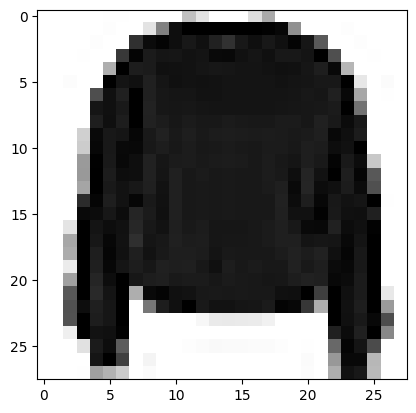

In [ ]:
# Plot a single sample
plt.imshow(train_data[7], cmap=plt.cm.binary)
plt.show()

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're humean-readable
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_name)

10

Text(0.5, 1.0, 'Coat')

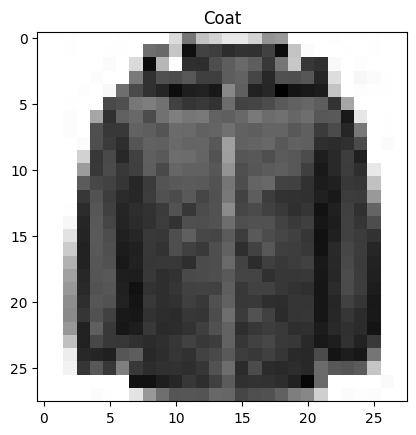

In [ ]:
#Plot an exampe image and its label
index_of_choice = 555
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

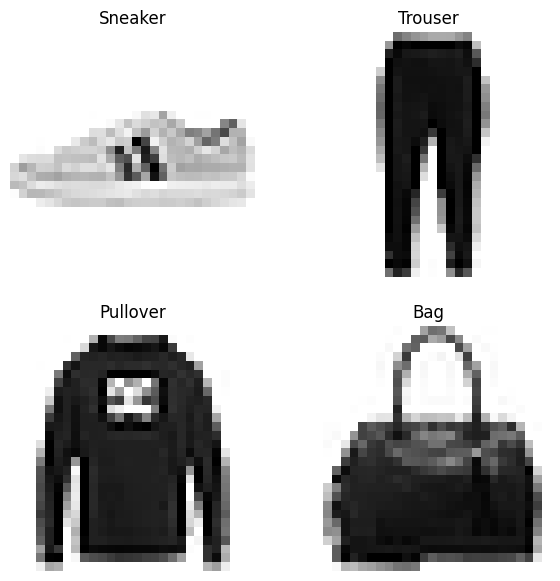

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  ran_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[ran_index], cmap=plt.cm.binary)
  plt.title(class_name[train_labels[ran_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  - if your labels are one-hot enconded, use CategoricalCrossentropy()
  - if your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
# Our data need to be flattened (from 28x28 to None, 784)
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])
flatten_model.output_shape

(None, 784)

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Complie the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data,test_labels)
                                )

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5618 - accuracy: 0.0989 - val_loss: 2.3031 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 3140      
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Scale features(normalize or standardize, neural networks tend to prefer normalization)

Neural networks prefer data to be scaled, which is also referred to as normalized. This means, they like to have number in the tensor and they try to find patterns between 0 and 1.

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Now we have our training data between 0 and 1. How do we change it between 0 and 1?

In [ ]:
# We can get our training and testing data bewtween 0 & 1 by dividing by the maximum.
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

Now that our data is between 0 and 1 lets see what happens when we model it.

In [ ]:
# now oir data is normalized, let's build a model to find patterns in it

# set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3138 - accuracy: 0.4874 - val_loss: 1.0214 - val_accuracy: 0.6007
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8854 - accuracy: 0.6769 - val_loss: 0.8061 - val_accuracy: 0.7252
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7364 - accuracy: 0.7437 - val_loss: 0.7308 - val_accuracy: 0.7510
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6695 - accuracy: 0.7709 - val_loss: 0.6752 - val_accuracy: 0.7797
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6387 - accuracy: 0.7813 - val_loss: 0.6587 - val_accuracy: 0.7801
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6208 - accuracy: 0.7871 - val_loss: 0.6487 - val_accuracy: 0.7838
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6099 - accuracy: 0.7895 - val_loss: 0.6520 - val_accuracy:

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

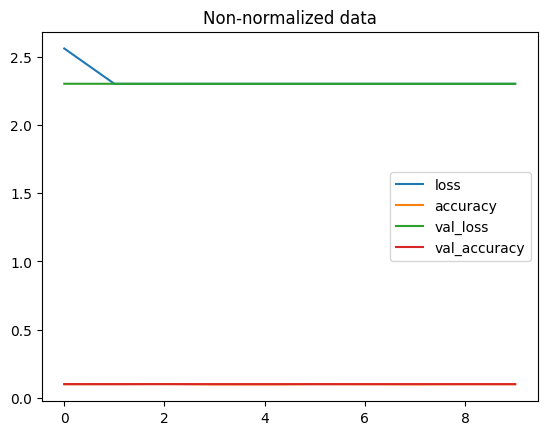

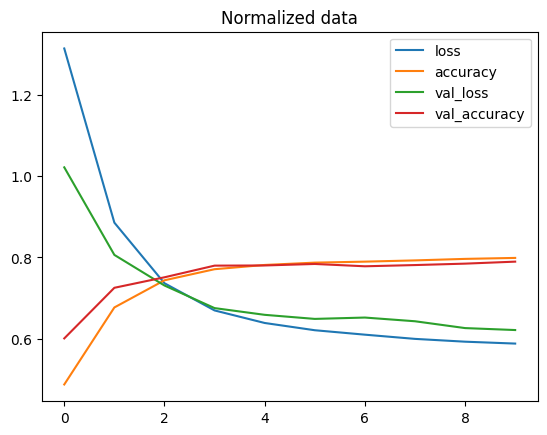

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it is importan to make sure you are comparing them on the same criteria (e.g. same architecture but different data or same different data butdifferent architecture)

## Finding the ideal learning rate

The ideal learning rate is the learning rate value where the loss decreases the most.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                                train_labels,
                                epochs=40,
                               validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2264 - accuracy: 0.5630 - val_loss: 0.8825 - val_accuracy: 0.7001 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7930 - accuracy: 0.7244 - val_loss: 0.7684 - val_accuracy: 0.7403 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7169 - accuracy: 0.7461 - val_loss: 0.7297 - val_accuracy: 0.7459 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6882 - accuracy: 0.7538 - val_loss: 0.7063 - val_accuracy: 0.7518 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6709 - accuracy: 0.7577 - val_loss: 0.6827 - val_accuracy: 0.7572 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6579 - accuracy: 0.7635 - val_loss: 0.7161 - val_accuracy: 0.7495 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

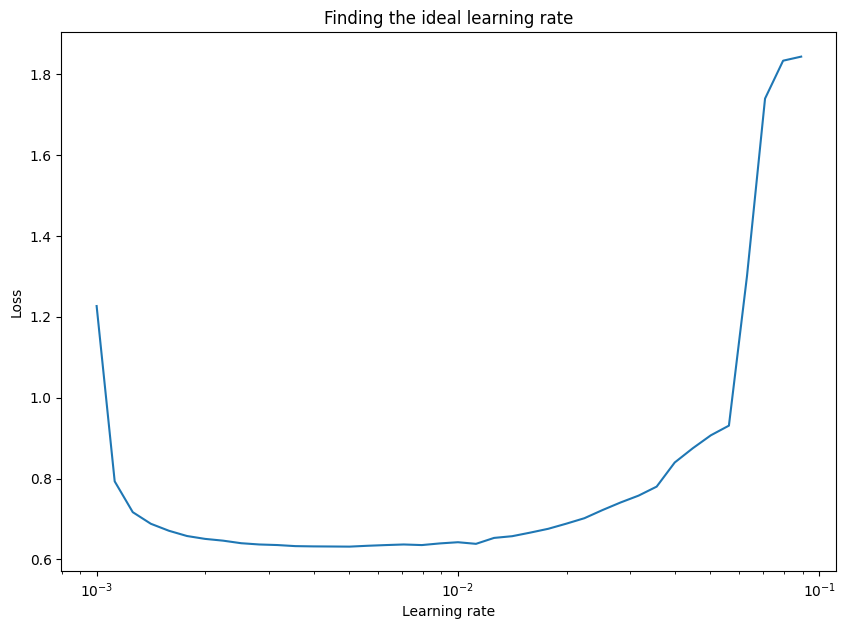

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs= 1e-3 * (10**(np.arange(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

For our problem, the ideal learning rate is just the default value for Adam().

In [ ]:
# Let's retif a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3355 - accuracy: 0.4860 - val_loss: 1.0513 - val_accuracy: 0.6073
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9806 - accuracy: 0.6191 - val_loss: 0.9669 - val_accuracy: 0.6358
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9006 - accuracy: 0.6589 - val_loss: 0.9017 - val_accuracy: 0.6704
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8335 - accuracy: 0.6888 - val_loss: 0.8390 - val_accuracy: 0.6859
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7943 - accuracy: 0.7050 - val_loss: 0.8089 - val_accuracy: 0.6994
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7740 - accuracy: 0.7127 - val_loss: 0.8043 - val_accuracy: 0.7010
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7600 - accuracy: 0.7183 - val_loss: 0.7811 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go throught the top 2...

In [ ]:
# create a confunsion matrix

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true,y_pred, classes=None, figsize=(10,10),text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be claseses

  if classes:
    labels = classes
  else: labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) /2.

  #Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)



In [ ]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) #probs is short for prediction probabilites

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.80276984e-04, 2.24189959e-12, 7.92636129e-05, 1.32971283e-04,
        3.07657982e-10, 4.75587808e-02, 1.08683365e-04, 7.16677427e-01,
        3.91063310e-04, 2.34871462e-01],
       [4.49458398e-02, 6.90568129e-07, 8.03608239e-01, 1.91919651e-04,
        2.48881038e-02, 3.00477000e-29, 1.26348838e-01, 2.13207064e-18,
        1.63836103e-05, 1.62790397e-22],
       [2.54997518e-03, 9.88348603e-01, 1.94803040e-09, 9.08824615e-03,
        4.60580990e-10, 2.87825368e-25, 1.31300212e-05, 4.61066969e-14,
        8.77994454e-13, 7.43161834e-08],
       [8.62600427e-05, 9.98675942e-01, 1.48448159e-12, 1.23372767e-03,
        4.49562615e-13, 4.63004621e-26, 1.01942852e-07, 1.43384314e-14,
        1.21052485e-15, 4.08446931e-06],
       [2.70057648e-01, 2.15638261e-02, 5.94014190e-02, 1.41854823e-01,
        7.57998154e-02, 2.70093074e-14, 4.30534899e-01, 6.78170498e-09,
        7.87652913e-04, 4.73938666e-10]], dtype=float32)

> 🔑**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictins on normalized data).

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_name[tf.argmax(y_probs[0])]

(array([1.80276984e-04, 2.24189959e-12, 7.92636129e-05, 1.32971283e-04,
        3.07657982e-10, 4.75587808e-02, 1.08683365e-04, 7.16677427e-01,
        3.91063310e-04, 2.34871462e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Sneaker')

In [ ]:
# Convert all of the predictions probabilites into intergers
y_preds = y_probs.argmax(axis=1)

#View the first 10 predictions labels
y_preds[:10]

array([7, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[706,   6,  36,  98,  41,   1,  91,   0,  21,   0],
       [  7, 934,   4,  39,   3,   0,  10,   0,   3,   0],
       [ 19,   1, 587,  15, 266,   1,  96,   0,  15,   0],
       [ 22,  30,   7, 797,  47,   0,  72,   2,  22,   1],
       [  2,   1, 140,  20, 760,   0,  51,   0,  26,   0],
       [  0,   0,   0,   6,   0, 823,   0, 130,  25,  16],
       [127,   8, 139,  67, 463,   1, 154,   0,  41,   0],
       [  0,   0,   0,   0,   0,  82,   0, 815,   1, 102],
       [  0,   0,   4,  13,  41,  27,   6,   3, 904,   2],
       [  0,   0,   0,   1,   1,   2,   0, 120,   1, 875]])

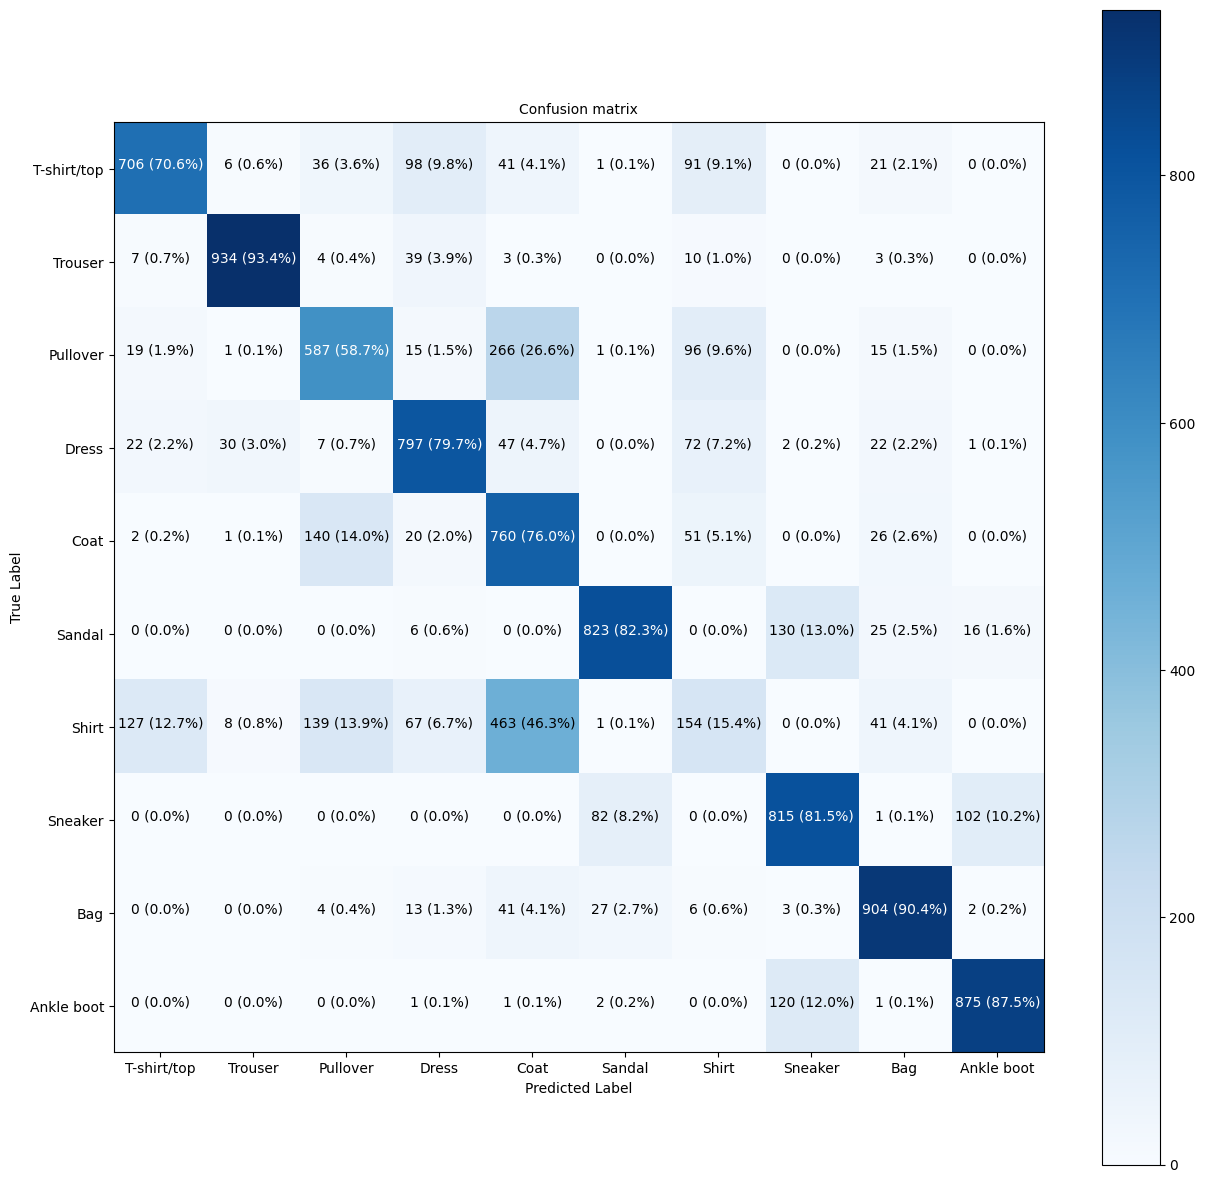

In [ ]:
# Make a prettier confusoin matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes=class_name,
                      figsize=(15,15),
                      text_size = 10)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function fo:
* Plot a random image
* Make a prediction on said image
* Label the plot with truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels,classes):
  """
  Pick a random image, plots it and labels it with a prediction and truth label
  """
  # Set up random interger
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pre: {}{:2.0f}% (True:{})".format(pred_label,
                                                100*tf.reduce_max(pred_probs),
                                                true_label),
             color = color) # set the color to green or red based on if the prediction is right or wrong



1/1 [==============================] - 0s 43ms/step


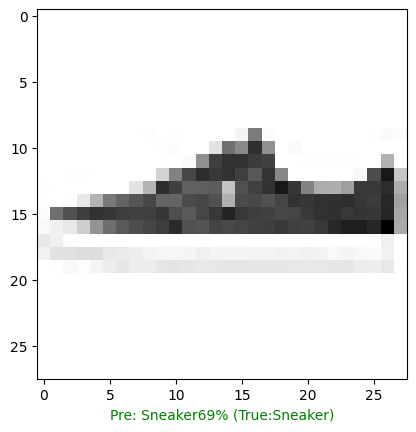

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model= model_14,
                  images = test_data_norm, #always make predictions on the same kind of data
                  true_labels=test_labels,
                  classes=class_name)

## What patterns is our model learning

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

#Shapes
weights, weights.shape

(array([[ 0.04331072,  0.63628584,  0.17635453, -0.04816084],
        [-0.03254288,  1.311477  ,  0.06528395, -0.03364576],
        [ 0.03773709,  0.6759625 ,  0.69422567, -0.08283114],
        ...,
        [ 0.01951302,  0.27821597, -0.09154051,  0.02161974],
        [ 0.0828193 ,  0.16818197, -0.1321211 ,  0.01159227],
        [-0.08406506,  0.02245728,  0.37827006, -0.01894113]],
       dtype=float32),
 (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Each value in the weights matrix corresponds to how a particular value in the data set should influence the network's decisions.

1. Initalize with random weights (only at the begining)
2. Show examples
3. Update representation outputs (weights & biases)
4. Repeat with more examples

So the weights will be random until our model learns and slowly corrects those weights to be the right output

Now let's check out the bias vector...

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([-0.04670167,  2.7978098 ,  3.155371  , -0.0167464 ], dtype=float32),
 (4,))

For every hidden unit in our neural network in the first layer, it has one bias vector (one value per hidden unit).  This is key difference between a bias vector and a weights matrix. A weights matrix has one value per data point.

Every neuron has a *bias vector*. Each of these is paired with a weigths matrix.

The *bias vector* also gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The *bias vector* dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


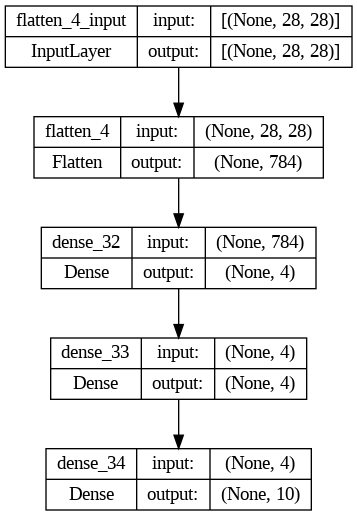

In [ ]:
# Let's check out another way of viewing oyr deep learning model
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14,show_shapes=True)
